## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5
#### Бинарная клаccификация
### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Фаик Карим Яссерович
##### Группа:   НФИбд-02-21

***

### Вариант №_17_

Вариант 17 

Japanese Credit Screening Data Set  

Название файла: crx.data 

Ссылка: https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/  

Класс: A16 (столбец No 16) 

Метод отбора признаков – отбор на основе важности признаков (ExtraTreesClassifier) 

Модели классификации: 

классификатор ближайших соседей (к-во соседей = 3) 

классификатор ближайших соседей (к-во соседей = 5) 

классификатор LDA 

Кривая для визуализации - ROC-кривая 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc, plot_roc_curve
import matplotlib.pyplot as plt

# 1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов. 

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
data = pd.read_csv(url, header=None, names=column_names, na_values='?')

In [3]:
print("Первые 5 строк данных:")
print(data.head())

Первые 5 строк данных:
  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0   +


# 2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс. 

In [4]:
data_cleaned = data.dropna(subset=['A16'])
print("\nДанные после удаления пропущенных значений в столбце A16:")
print(data['A16'].value_counts())
print("\nКоличество строк после удаления пропущенных значений в 'A16':", len(data_cleaned))


Данные после удаления пропущенных значений в столбце A16:
A16
-    383
+    307
Name: count, dtype: int64

Количество строк после удаления пропущенных значений в 'A16': 690


In [5]:
print(f"\nКоличество пропущенных значений в столбце 'A16': {data['A16'].isnull().sum()}")


Количество пропущенных значений в столбце 'A16': 0


# 3. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов. 

In [6]:
data_cleaned = data_cleaned[['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16']]

for column in ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned.groupby('A16')[column].transform('mean'))

print("\nДанные после заполнения пропусков:")
print(data_cleaned.head())


Данные после заполнения пропусков:
      A2     A3    A8  A11    A14  A15 A16
0  30.83  0.000  1.25    1  202.0    0   +
1  58.67  4.460  3.04    6   43.0  560   +
2  24.50  0.500  1.50    0  280.0  824   +
3  27.83  1.540  3.75    5  100.0    3   +
4  20.17  5.625  1.71    0  120.0    0   +


# 4. Выполните стандартизацию признаков набора данных. . 

In [7]:
X = data_cleaned.drop(columns=['A16'])  # Отделяем признаки
y = data_cleaned['A16']  # Метки классов

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("\nСтандартизированные данные (первые 5 строк):")
print(X_scaled.head())


Стандартизированные данные (первые 5 строк):
         A2        A3        A8       A11       A14       A15
0 -0.060682 -0.956613 -0.291083 -0.288101  0.104599 -0.195413
1  2.289255 -0.060051  0.244190  0.740830 -0.819543 -0.087852
2 -0.594988 -0.856102 -0.216324 -0.493887  0.557952 -0.037144
3 -0.313908 -0.647038  0.456505  0.535044 -0.488247 -0.194837
4 -0.960478  0.174141 -0.153526 -0.493887 -0.372002 -0.195413


# 5. Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений. 

In [8]:
model = ExtraTreesClassifier()
model.fit(X_scaled, y)
importance = model.feature_importances_
important_features = pd.Series(importance, index=X.columns).nlargest(2).index
print("\nДва наиболее значимых признака:", important_features.tolist())


Два наиболее значимых признака: ['A8', 'A11']


In [9]:
X_selected = X_scaled[important_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

print("\nРазмеры обучающей и тестовой выборок:")
print("Обучающая выборка:", X_train.shape)
print("Тестовая выборка:", X_test.shape)


Размеры обучающей и тестовой выборок:
Обучающая выборка: (483, 2)
Тестовая выборка: (207, 2)


# 6. Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных. 

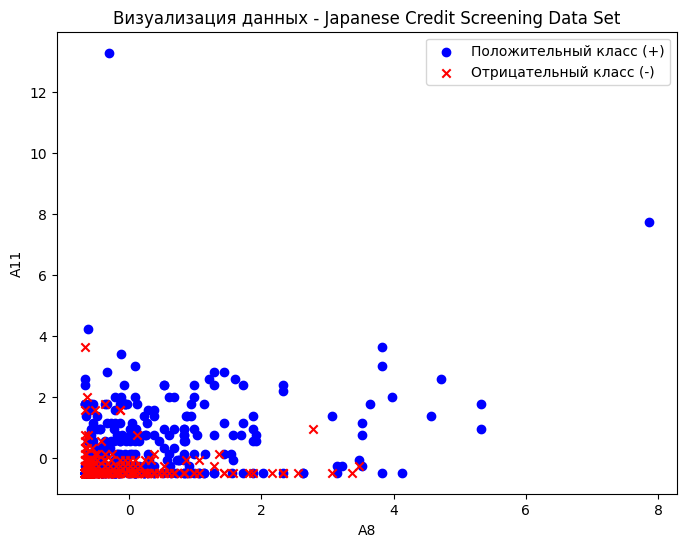

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_selected[y == '+'].iloc[:, 0], X_selected[y == '+'].iloc[:, 1], color='b', marker='o', label='Положительный класс (+)')
plt.scatter(X_selected[y == '-'].iloc[:, 0], X_selected[y == '-'].iloc[:, 1], color='r', marker='x', label='Отрицательный класс (-)')
plt.xlabel(important_features[0])
plt.ylabel(important_features[1])
plt.title('Визуализация данных - Japanese Credit Screening Data Set')
plt.legend()
plt.show()

# 7. Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# KNN с k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

# KNN с k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

# Линейный дискриминантный анализ (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
print(X_test.dtypes)
print(y_test.dtype)

A8     float64
A11    float64
dtype: object
object


# 8. Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6. 

C:\Users\Gigabyte\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


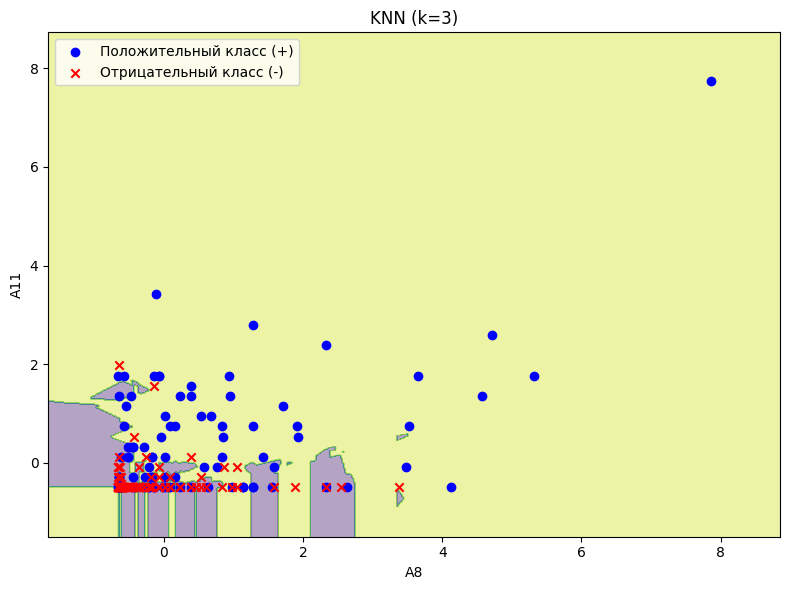

C:\Users\Gigabyte\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


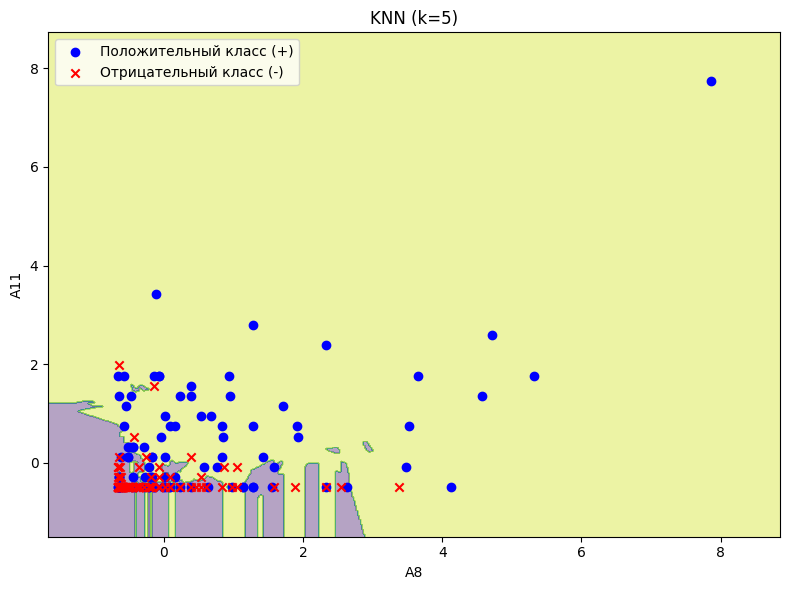

C:\Users\Gigabyte\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


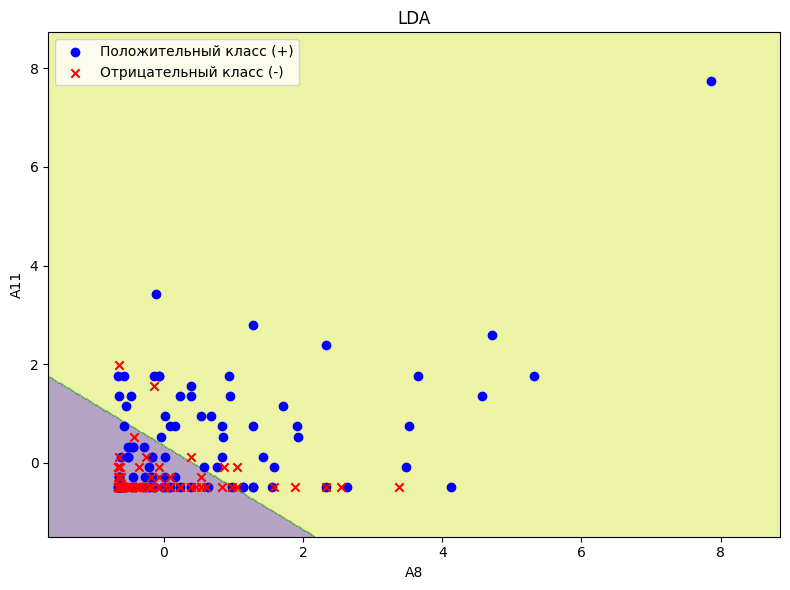

In [14]:
def plot_decision_boundary(model, X, y, important_features, title, figsize=(8, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    
    h = .02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_grid)
    Z = np.where(Z == '+', 1, 0).reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[y == '+'].iloc[:, 0], X[y == '+'].iloc[:, 1], color='b', marker='o', label='Положительный класс (+)')
    ax.scatter(X[y == '-'].iloc[:, 0], X[y == '-'].iloc[:, 1], color='r', marker='x', label='Отрицательный класс (-)')
    ax.set_xlabel(important_features[0])
    ax.set_ylabel(important_features[1])
    ax.set_title(title)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Создаем отдельные графики для каждой модели
plot_decision_boundary(knn3, X_test, y_test, important_features, 'KNN (k=3)')
plot_decision_boundary(knn5, X_test, y_test, important_features, 'KNN (k=5)')
plot_decision_boundary(lda, X_test, y_test, important_features, 'LDA')

# 9. Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов. 

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

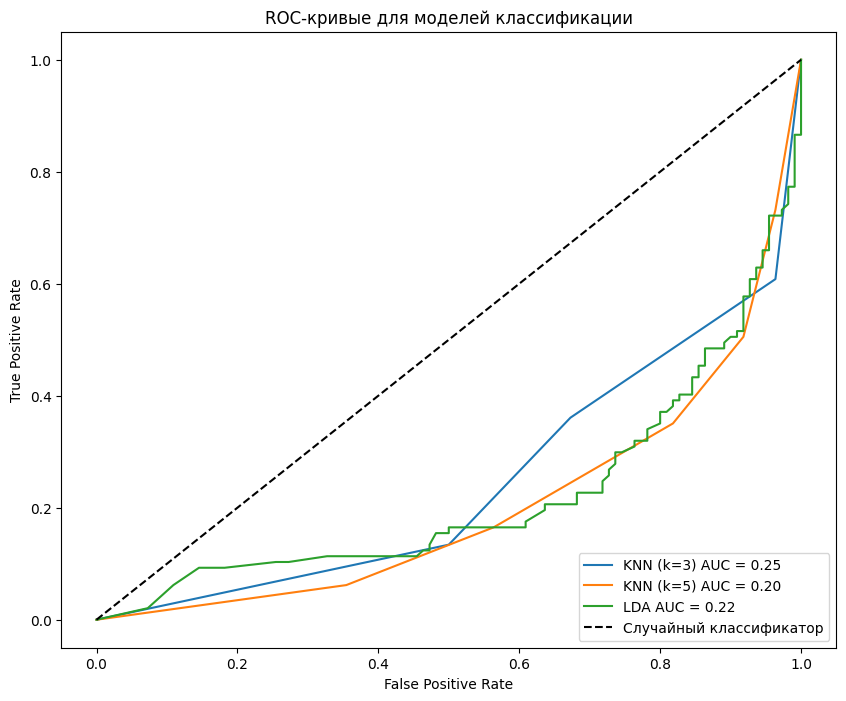

In [16]:
plt.figure(figsize=(10, 8))

# KNN (k=3)
knn3_fpr, knn3_tpr, _ = roc_curve(y_test.map({'+': 1, '-': 0}), knn3.predict_proba(X_test)[:, 1])
plt.plot(knn3_fpr, knn3_tpr, label="KNN (k=3) AUC = {:.2f}".format(roc_auc_score(y_test.map({'+': 1, '-': 0}), knn3.predict_proba(X_test)[:, 1])))

# KNN (k=5)
knn5_fpr, knn5_tpr, _ = roc_curve(y_test.map({'+': 1, '-': 0}), knn5.predict_proba(X_test)[:, 1])
plt.plot(knn5_fpr, knn5_tpr, label="KNN (k=5) AUC = {:.2f}".format(roc_auc_score(y_test.map({'+': 1, '-': 0}), knn5.predict_proba(X_test)[:, 1])))

# LDA
lda_fpr, lda_tpr, _ = roc_curve(y_test.map({'+': 1, '-': 0}), lda.predict_proba(X_test)[:, 1])
plt.plot(lda_fpr, lda_tpr, label="LDA AUC = {:.2f}".format(roc_auc_score(y_test.map({'+': 1, '-': 0}), lda.predict_proba(X_test)[:, 1])))

plt.plot([0, 1], [0, 1], 'k--', label="Случайный классификатор")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для моделей классификации')
plt.legend(loc='lower right')
plt.show()

# 10. Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9. 
 

In [17]:
models_auc = {
    'KNN (k=3)': roc_auc_score(y_test.map({'+': 1, '-': 0}), knn3.predict_proba(X_test)[:, 1]),
    'KNN (k=5)': roc_auc_score(y_test.map({'+': 1, '-': 0}), knn5.predict_proba(X_test)[:, 1]),
    'LDA': roc_auc_score(y_test.map({'+': 1, '-': 0}), lda.predict_proba(X_test)[:, 1])
}

best_model = max(models_auc, key=models_auc.get)
print(f"Лучшая модель по показателю AUC: {best_model} с AUC = {models_auc[best_model]:.2f}")

Лучшая модель по показателю AUC: KNN (k=3) с AUC = 0.25
